## Setup

----


1. User data needed: Age, price point, skin type, description of skin (image, quiz selection, text input)

## Classifying Skin Type as Dry, Oily, or Normal using Logistic Regression

### imports

In [229]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import SVC

In [45]:
data = pd.read_csv("training.csv", encoding='windows-1252')

In [46]:
data

,Text
0,rough texture\tDry\t
1,dullness\tDry\t93
2,ashy tone\tDry\t96
3,"skin often feels tight, rough, or looks dull a..."
4,Dry skin is dehydrated which impairs exfoliati...
...,...
184,Thicker skin\tOily\t
185,"Generally, people with oily skin have large po..."
186,As excessive oil build-up can lead to greasy s...
187,Extreme shiny or greasy appearance: Having shi...


In [47]:
# Go through each row: if contains "Dry" then it's dry, if oily then Oily label.
txt_data = data["Text"]
labels = []
for i in range(len(txt_data)):
  if "Oily" in txt_data[i]:
    labels += ["1"]
  if "Dry" in txt_data[i]:
    labels+=[0]

In [48]:
labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1']

In [49]:
clean_txt = []
for i in range(len(txt_data)):
  indx = txt_data[i].index("\t")
  clean_txt += [txt_data[i][:indx]]

In [86]:
clean_txt

['rough texture',
 'dullness',
 'ashy tone',
 'skin often feels tight, rough, or looks dull and flaky,',
 'Dry skin is dehydrated which impairs\xa0exfoliation\xa0and increases the risk of inflammation.',
 'Rough, flaky, or peeling skin',
 'Dull, lackluster appearance',
 'Invisible pores',
 'More prominent appearance of fine lines and wrinkles',
 'In darker skin tones, skin may look ashy or gray',
 'Minimal shine and oiliness',
 'Prone to flaking, peeling, and irritation',
 'Can feel itchy and uncomfortable',
 'More vulnerable to environmental damage',
 'Shows signs of aging like wrinkles more readily',
 'Makeup may cling to dry patches',
 'If severely dry, skin barrier may be impaired, increasing risk of sensitivity and inflammation',
 'Less prone to breakouts and enlarged pores',
 'Tends to be less sensitive than oily skin',
 'Often feels soft and smooth when properly hydrated',
 'Minimal shine and oiliness',
 'A shiny or greasy appearance, especially in the T-zone (forehead, nose, ch

In [51]:
df = pd.DataFrame({"Text":clean_txt, "Label":labels})

In [87]:
df

,Text,Label
0,rough texture,0
1,dullness,0
2,ashy tone,0
3,"skin often feels tight, rough, or looks dull a...",0
4,Dry skin is dehydrated which impairs exfoliati...,0
...,...,...
184,Thicker skin,1
185,"Generally, people with oily skin have large po...",1
186,As excessive oil build-up can lead to greasy s...,1
187,Extreme shiny or greasy appearance: Having shi...,1


<Axes: xlabel='Label', ylabel='count'>

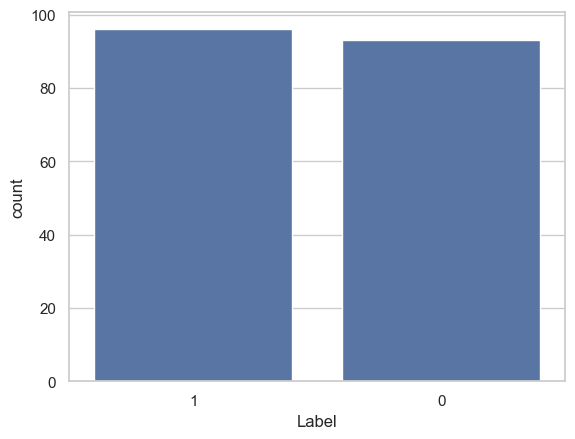

In [61]:
sns.set_theme(style="whitegrid")
sns.barplot(data=df["Label"].value_counts())

In [62]:
df

,Text,Label
0,rough texture,0
1,dullness,0
2,ashy tone,0
3,"skin often feels tight, rough, or looks dull a...",0
4,Dry skin is dehydrated which impairs exfoliati...,0
...,...,...
184,Thicker skin,1
185,"Generally, people with oily skin have large po...",1
186,As excessive oil build-up can lead to greasy s...,1
187,Extreme shiny or greasy appearance: Having shi...,1


## Basic Log Regression

In [235]:
model = LogisticRegression()
vectorizer = CountVectorizer()

In [233]:
X = vectorizer.fit_transform(df["Text"])
X_train, X_test, y_train, y_test = train_test_split(X, list(df["Label"]), test_size=0.2)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [234]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)


Accuracy: 0.58
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.17      0.27        18
           1       0.56      0.95      0.70        20

    accuracy                           0.58        38
   macro avg       0.65      0.56      0.49        38
weighted avg       0.65      0.58      0.50        38



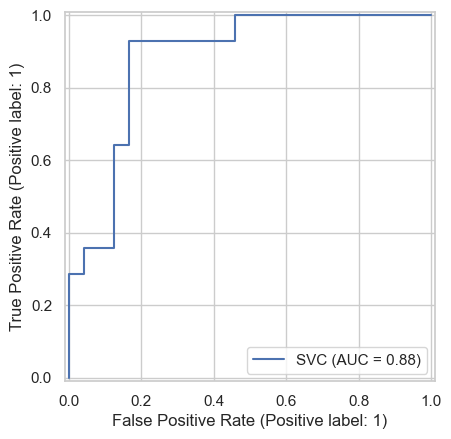

In [220]:
clf = SVC(random_state=0).fit(X_train, y_train)
RocCurveDisplay.from_estimator(
  clf, X_test, y_test
)